***
# Statistics & Public Health 2: Data Analysis
---
## Author: Tolulope Acquah
---

***
# Table of Contents

[Part 1: Basic Analysis](#PART-1:-BASIC-ANALYSIS) <br>
- [Question 1: Binary Column and Dummy Variables](#Part-1---QUESTION-1) <br>
- [Question 2: Average Number of Mosquitoes Per Month](#Part-1---QUESTION-2)<br>

[Part 2: Statistical Analysis](#PART-2:-STATISTICAL-ANALYSIS) <br>
- [Question 1: Statistically Significant Difference Between the Different Mosquito Species](#Part-2---QUESTION-1) <br>
- [Question 2: Positively and Negatively Correlated with Number of Mosquitoes](#Part-2---QUESTION-2)<br>

[Part 3: Advanced Statistical Analysis](#PART-3:-ADVANCED-STATISTICAL-ANALYSIS)<br>
- [Question 1: Linear Regression Model](#Part-3---QUESTION-1)<br>
    - [Model 1.1 - Original Model](#Model-1.1---Original)<br>
    - [Model 1.2](#Model-1.2)<br>
    - [Model 1.3](#Model-1.3)<br>
    - [Model 1.4](#Model-1.4)<br>
    - [Model 1.5](#Model-1.5)<br>
    - [Model Diagnostics](#MODEL-DIAGNOSTICS:)<br>
- [Question 2: Logistic Regression Model](#Part-3---QUESTION-2)<br>
    - [Model 2.1 - Original Model](#Model-2.1---Original-Model)<br>
    - [Model 2.2](#Model-2.2)<br>
    - [Model 2.3](#Model-2.3)<br>
    - [Model 2.4](#Model-2.4)<br>
***

# Introduction

For this deliverable, I will be performing Basic, Statistical, and Advanced Statistical Analysis on the mosquito tracking data to analyze the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [2]:
mosquito_df = pd.read_csv('mosquito_data_part_2.csv')

In [3]:
mosquito_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


---

# PART 1: BASIC ANALYSIS

---

## Part 1 - QUESTION 1 

**Convert the `WNV Present` column into a binary column and create dummy variables from the `Trap type` column.**

---

To convert the `WNV Present` column into a binary column, I used the `.map` function to convert "positive" to a value of 1, and "negative" to a value of 0, converting the column to binary data.

In [4]:
# Convert to a binary column:

mosquito_df["WNV Present"] = mosquito_df["WNV Present"].map({"positive": 1, "negative": 0})
mosquito_df.rename({"WNV Present": "WNV Present_positive"}, axis=1, inplace=True)

Just to make sure this worked, I did a `.value_counts()` to count the values in each category, positive (1) and negative (0) below:

In [5]:
mosquito_df["WNV Present_positive"].value_counts()

0    14501
1     3994
Name: WNV Present_positive, dtype: int64

The `WNV Present` column has now been converted into a binary column, where "positive" is now a value of "1", and "negative" is now a value of "0".


Taking a look at the count for each category under the `WNV Present` column, we can see that there are more negative WNV tests than there are positive WNV tests.

In [6]:
# to check that it worked in the overall dataset:
mosquito_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


To create dummy variables from the `Trap type` column, I used the function: `pd.get_dummies` to convert the column to binary data based on its distinct categories. I then used the `pd.concat` function to concatenate the binary data into the original dataframe. The original dataframe now has the new dummy variables, but also still the original `Trap type` column, so I used `.drop()` to drop the original `Trap type` column. The process to accomplishing this is provided below:

**First, I created dummy variables from the `Trap type` column:**

In [7]:
trap_type_df = pd.get_dummies(mosquito_df['Trap type'])

trap_type_df.head()

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


**Now that I created dummy variables for the `Trap type` column, I concatenated the dummy variables to the original dataset.**

In [8]:
mosquito_df = pd.concat([mosquito_df, trap_type_df], axis=1)
mosquito_df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


**The dummy variables are now concatenated into the original dataset, now there are duplicates between the `Trap type` column, and the dummy variables. In the next step, I dropped the original `Trap type` column to avoid this.**

In [9]:
mosquito_df = mosquito_df.drop("Trap type", axis=1)
mosquito_df.head() #to check that it worked

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


Now that the original `Trap type` column is dropped, there are four (4) columns containing the dummy variables created from the `Trap type` column.

## Part 1 - QUESTION 2

**What is the average number of mosquitoes for each month? What trends do you notice?**

---

To find the average number of mosquitoes for each month, I first grouped the data frame by the `Month` column, and found the average using the `.mean()` function on the `Mosquito number` column.

In [10]:
# What is the average number of mosquitoes for each month?

avg_mosquito = mosquito_df.groupby("Month").mean()["Mosquito number"]
avg_mosquito

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

The average number of mosquitoes for each month was visualized below to see if there are any trends. For the purpose of easy readability of the visualization, a new column was created to have the month name for each row and corresponding mosquito number.

In [11]:
avg_mosquito_month = pd.DataFrame(avg_mosquito)
avg_mosquito_month["Month"] = ["May", "June", "July", "August", "September", "October"]
avg_mosquito_month

,Mosquito number,Month
Month,,
5,2.761905,May
6,10.264442,June
7,11.551879,July
8,12.111321,August
9,8.394973,September
10,5.377778,October


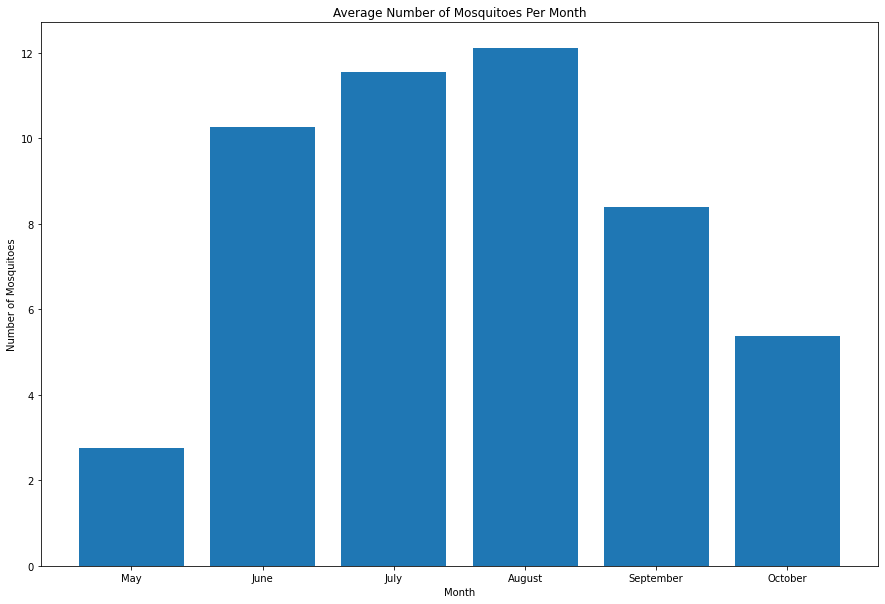

In [12]:
plt.figure(figsize=(15,10))
plt.bar(avg_mosquito_month.Month,
       avg_mosquito_month["Mosquito number"])
plt.xlabel("Month")
plt.ylabel("Number of Mosquitoes")
plt.title("Average Number of Mosquitoes Per Month")
plt.show()

**What trends do you notice?**

---

The bar chart above shows that there are more mosquitoes in the month of August, followed by July, then June. The month with the lowest number of mosquitoes in the dataset is in May, followed by October, then September. There is a significant increase in the number of mosquitoes from May to June, going from an average of about 3 mosquitoes caught in May, to an average of over 10 in June. There is a consistent increase in the average number of mosquitoes from June to August before it declines significantly in September and October.

This could mean that there are more mosquitoes due to the change in weather, meaning that as it gets warmer, the number of mosquitoes increase. And, as the weather starts to cool down, the average number of mosquitoes decrease. It is interesting that the average number of mosquitoes in September and October is more than the average in May, when May is warmer than September and October. It is possible that there might be missing/not enough data in the entire month of May to see if it is just an issue of not having enough data.

---
# PART 2: STATISTICAL ANALYSIS
---

## Part 2 - QUESTION 1

**Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus**

---

Mosquito species is a categorical data and the presence of West Nile Virus is also a categorical outcome of either "positive" or "negative", in this case: 1 for positive, and 0 for negative. Based on this, a Chi Squared test was chosen to be used to determine if there is a statistically significant difference between the mosquito species when looking at the occurrence of West Nile Virus.


Before running a Chi Square hypothesis test, I defined the null hypothesis and alternative hypothesis.

**Hypothesis Test:**

$H_0$: There is no difference between the different mosquito species when looking at the occurrence of West Nile Virus. 

$\;\; vs \;\;$  

$H_1$: There is a difference between the different mosquito species when looking at the occurrence of West Nile Virus.


**Threshold:** 
If the p-value < 0.05, then the $H_0$ will be rejected, and it can be concluded that there is a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus.

In [13]:
# to have the original data present:
mosquito_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


The `Species` and `WNV Present_positive` column were grouped, and the values in the dataset are counted based on the grouping:

In [14]:
mosquito_df.groupby(["Species","WNV Present_positive"]).count()

Year  Week  Address Block  Trap  Date  \
Species          WNV Present_positive                                          
CULEX PIPIENS    0                     4074  4074           4074  4074  4074   
                 1                     1412  1412           1412  1412  1412   
CULEX RESTUANS   0                     9309  9309           9309  9309  9309   
                 1                     2557  2557           2557  2557  2557   
CULEX SALINARIUS 0                      215   215            215   215   215   
                 1                       11    11             11    11    11   
CULEX TERRITANS  0                      903   903            903   903   903   
                 1                       14    14             14    14    14   

                                       Mosquito number   Lat   Lon  Month  \
Species          WNV Present_positive                                       
CULEX PIPIENS    0                                4074  4074  4074   4074   
                 1                                1412  1412  1412   1412   
CULEX RESTUANS   0                                9309  9309  9309   9309   
                 1                                2557  2557  2557   2557   
CULEX SALINARIUS 0                                 215   215   215    215   
                 1                                  11    11    11     11   
CULEX TERRITANS  0                                 903   903   903    903   
                 1                                  14    14    14     14   

                                        CDC  GRAVID   OVI  SENTINEL  
Species          WNV Present_positive                                
CULEX PIPIENS    0                     4074    4074  4074      4074  
                 1                     1412    1412  1412      1412  
CULEX RESTUANS   0                     9309    9309  9309      9309  
                 1                     2557    2557  2557      2557  
CULEX SALINARIUS 0                      215     215   215       215  
                 1                       11      11    11        11  
CULEX TERRITANS  0                      903     903   903       903  
                 1                       14      14    14        14

Since the counts for every column are the same for the grouped `Species` and `WNV Present_positive` column. I chose the `Mosquito number` column to continue with creating the contingency table for the Chi Squared test.

In [15]:
species_WNV_prevalence = mosquito_df.groupby(["Species","WNV Present_positive"]).count()["Mosquito number"].unstack()

In [16]:
species_WNV_prevalence

WNV Present_positive,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


With these counts for each species and WNV prevalence (keeping in mind that *positive* WNV tests are counted under the "1" column, and *negative* WNV tests are counted under the "0" column), I can now determine if there is a difference in the mosquito species regarding the occurrence of West Nile Virus. This contingency table will be passed into the `chi2_contingency()` function:

In [17]:
stats.chi2_contingency(species_WNV_prevalence)

(311.10394683130164,
 3.9302341764409087e-67,
 3,
 array([[4301.29689105, 1184.70310895],
        [9303.5342525 , 2562.4657475 ],
        [ 177.19524196,   48.80475804],
        [ 718.97361449,  198.02638551]]))

The Chi Squared statistic is 311.10394683130164. The p-value is 3.9302341764409087e-67. The degrees of freedom is 3, and the array shows the expected distribution if there is no relationship.


**Conclusion:** With a p-value of 3.93e-67, which is way below the threshold set earlier of 0.05, the null hypothesis can be rejected that there is no difference between the different mosquito species when looking at the occurrence of West Nile Virus. It appears that there is a difference between the different mosquito species when looking at the occurrence of West Nile Virus.

---
## Part 2 - QUESTION 2 

**Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?**

---

To find which columns are positvely or negatively correlated with the number of mosquitoes caught, I used the function `.corr()` to check the correlations in the data set. If the correlation was above zero (0), it is a positive correlation. If the correlation is below zero, it is a negative correlation. If the correlation is zero, it is assumed that there is no correlation.

In [18]:
mosquito_df.corr()

,Year,Week,Mosquito number,WNV Present_positive,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,-0.011656,0.128327
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,-0.013587,0.043002
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,-0.005392,0.108575
WNV Present_positive,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,-0.003859,0.047073
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,0.001292,-0.017184
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,-0.004017,0.055548
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,-0.011988,0.035333
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.001280,-0.018611
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.035669,-0.518582
OVI,-0.011656,-0.013587,-0.005392,-0.003859,0.001292,-0.004017,-0.011988,-0.001280,-0.035669,1.000000,-0.000786


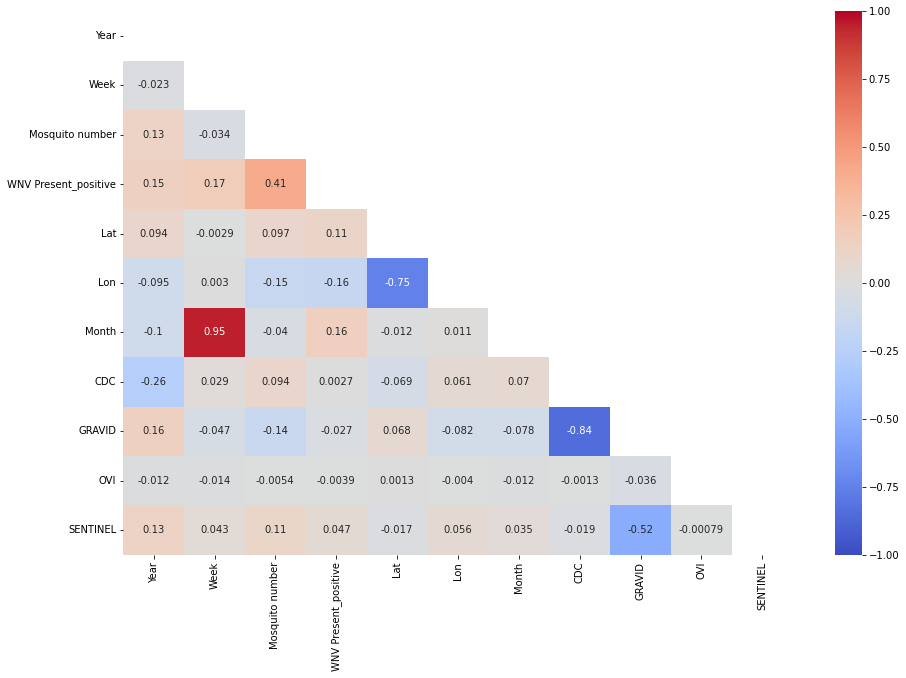

In [19]:
# it's hard to read in a table with all the columns, so a heatmap was created

mask = np.triu(mosquito_df.corr())

plt.figure(figsize=(15,10))

sns.heatmap(mosquito_df.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, mask=mask)

plt.show()

Based on the results in the table above, the columns that **positively correlate** with the number of mosquitoes caught are:
- WNV Present_positive
- Year
- Latitude
- CDC Trap Type
- Sentinel Trap Type
- Culex Restuans
- Culex Pipiens


The columns that **negatively correlate** with the number of mosquitoes caught are:
- Culex Territans (Mosquito Species)
- Culex Salinarius (Mosquito Species)
- Week
- Longitude
- Month
- Gravid Trap Type
- OVI Trap Type

**It should be noted that although there is some sort of negative correlation between the `OVI` column and the `Mosquito number` column, the correlation is really low at -0.0054, which could arguably be zero, where there is no significant correlation at all.**

---

**Are these correlations statistically significant?**

---
To find out if the correlations are statistically significant, the p-values were determined for each correlation. The first step was to define a null hypothesis, alternative hypothesis, and a threshold.

**Hypothesis Test:**

<center> $H_0$: the variables are not correlated, $\rho=0$.
<center> $H_1$: the variables are correlated, $\rho\neq0$.


**Threshold:** the null hypothesis ($H_0$) will be rejected if the p-values < 0.05

Now that the hypothesis and threshold have been identified, the next step was to define the independent and dependent variables. Because we are trying to determine if the columns are correlated with the number of mosquitoes caught, the dependent variable is the number of mosquitoes caught, and the independent variables are the other columns in the table (aside the number of mosquitoes caught).

In [20]:
# Define the independent variables:
X_ind = mosquito_df.drop(["Mosquito number"], axis=1)
X_ind.head()

,Year,Week,Address Block,Trap,Date,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


In [21]:
# Define the dependent variables:
Y_dep = mosquito_df["Mosquito number"]
Y_dep.head()

0    2
1    1
2    2
3    1
4    9
Name: Mosquito number, dtype: int64

In [22]:
print(X_ind.shape, Y_dep.shape) # to make sure I have the right number of columns and rows

(18495, 14) (18495,)


In [23]:
# Find the correlation coefficient and corresponding p-values:
for col in X_ind.columns:
    try:
        print(col, stats.pearsonr(X_ind[col],Y_dep))
    except:
        pass

Year (0.129325945493711, 8.39305001636186e-70)
Week (-0.033899607544960506, 4.0028248035812614e-06)
WNV Present_positive (0.40803439689029825, 0.0)
Lat (0.09681989674648855, 9.096861337579254e-40)
Lon (-0.1514211259689081, 2.7656039821236446e-95)
Month (-0.04042643719660004, 3.8038755209713405e-08)
CDC (0.09414701564247685, 1.0952570287564446e-37)
GRAVID (-0.13827479127699194, 1.2678161470302476e-79)
OVI (-0.005391611231864414, 0.4634394584283892)
SENTINEL (0.10857486046661327, 1.2893963696247895e-49)


The `try / except / pass` statements were used because there are non-numeric columns in the dataframe, and instead of outputting the error that the data type is not supported when using the `stats.pearsonr()` function, I wanted those columns to be skipped, essentially "`pass`"-ed to continue with the columns that *are* supported.

---
**Are these correlations statistically significant?**

---

The p-values and what they represent is summarized as follows:
- For **Year**, the p-value is 8.39305001636186e-70 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *positive correlation* between the `Year` column and `Mosquito number` column is statistically significant.


- For **Week**, the p-value is 4.0028248035812614e-06 which is also below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *negative correlation* between the `Week` column and `Mosquito number` column is statistically significant.


- For **WNV Present_positive**, the p-value is 0.0 which is below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *positive correlation* between the `WNV Present` column and `Mosquito number` column is statistically significant.


- For **Latitude (Lat)**, the p-value is 9.096861337579254e-40 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *positive correlation* between the `Lat` column and `Mosquito number` column is statistically significant.


- For **Longitude (Lon)**, the p-value is 2.7656039821236446e-95 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *negative correlation* between the `Lon` column and `Mosquito number` column is statistically significant.


- For **Month**, the p-value is 3.8038755209713405e-08 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *negative correlation* between the `Month` column and `Mosquito number` column is statistically significant.


- For **CDC (Trap Type)**, the p-value is 1.0952570287564446e-37 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *positive correlation* between the `CDC` column and `Mosquito number` column is statistically significant.


- For **GRAVID (Trap Type)**, the p-value is 1.2678161470302476e-79 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *negative correlation* between the `GRAVID` column and `Mosquito number` column is statistically significant.


- For **OVI (Trap Type)**, the p-value is 0.4634394584283892 which is above our threshold of 0.05, therefore, the null hypothesis cannot be rejected, and the *negative correlation* between the `OVI` column and `Mosquito number` column may not be statistically significant.


- For **SENTINEL (Trap Type)**, the p-value is 1.2893963696247895e-49 which is way below our threshold of 0.05, therefore, the null hypothesis is rejected, and the *positive correlation* between the `SENTINEL` column and `Mosquito number` column is statistically significant.

**In conclusion, all the correlation between the independent variables and the number of mosquitoes is statistically significant on the notion that the p-values were all below the threshold, 0.05 except that of the `OVI` column which had a higher p-value than the defined threshold. As noted earlier, the correlation between the `OVI` column and `Mosquito number` column was very low at -0.0054 which could arguably be zero, indicating that there might be no correlation at all.**

---
# PART 3: ADVANCED STATISTICAL ANALYSIS
---

## Part 3 - QUESTION 1

**Run a linear regression to determine how the independent variables affect the number of mosquitoes caught.**

---

**Explain your model construction process.**


**Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.**

**Note:**
- You will likely see a low R^2 value, that is to be expected.
- This dataset does not respond well to performing VIF analysis, so this is not required.
- `WNV Present` **must not** be one of your independent variables.

To run a linear regression to determine how the independent variables affect the number of mosquitoes caught, I followed these steps:

1. Define the independent and dependent variables.
2. Check for any linearity between each independent and dependent variables.
3. Check for any linearity between the independent variables.
4. Add a column of constants to the independent variable table.
5. Instantiate and fit the model.
6. Print out the summary.
7. Post model diagnostics:
    * Check for normality of residuals
    * Check for variance of residuals vs fitted values and make sure they are not homoscedastic

In [24]:
# to have the original dataset present:
mosquito_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


In [25]:
mosquito_df.groupby('Species').sum()["Mosquito number"]

Species
CULEX PIPIENS        61364
CULEX RESTUANS      137586
CULEX SALINARIUS       464
CULEX TERRITANS       1810
Name: Mosquito number, dtype: int64

Since linear regression only works with numeric columns, I did not include some columns that were not numerical:

* The `Date` column was not included because we already have Year, Week, and Month columns as numerical. These other columns can assist with determining how the overall date affects the number of mosquitoes caught.


* The Address Block is represented by the Latitude and Longitude columns, so the `Address Block` column was not included since it is not numerical.


* The `Trap` column is also represented by the created dummy variables from the original `Trap type` column.

* There are no current numerical columns representing the `Species` column, and there are four (4) categories within the column, so dummy variables will be created for the `Species` column that can be used in the linear regression model.

In [26]:
species_dummies_df = pd.get_dummies(mosquito_df['Species'])

species_dummies_df.head()

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [27]:
mosquito_df = pd.concat([mosquito_df, species_dummies_df], axis=1)
mosquito_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [28]:
mosquito_df = mosquito_df.drop("Species", axis=1)
mosquito_df.head() #to check that it worked

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


Now that the dummy variables from the mosquito species have been created, the linear regression model can be done.

In [29]:
# Define the independent and dependent variables:

# Independent variable:
X = mosquito_df.drop(["WNV Present_positive", "Address Block", "Trap", "Date", "Mosquito number"], axis=1)

# Dependent variable:
Y = mosquito_df["Mosquito number"]

print(X.shape, Y.shape) # to make sure I have the right number of columns and rows

(18495, 13) (18495,)


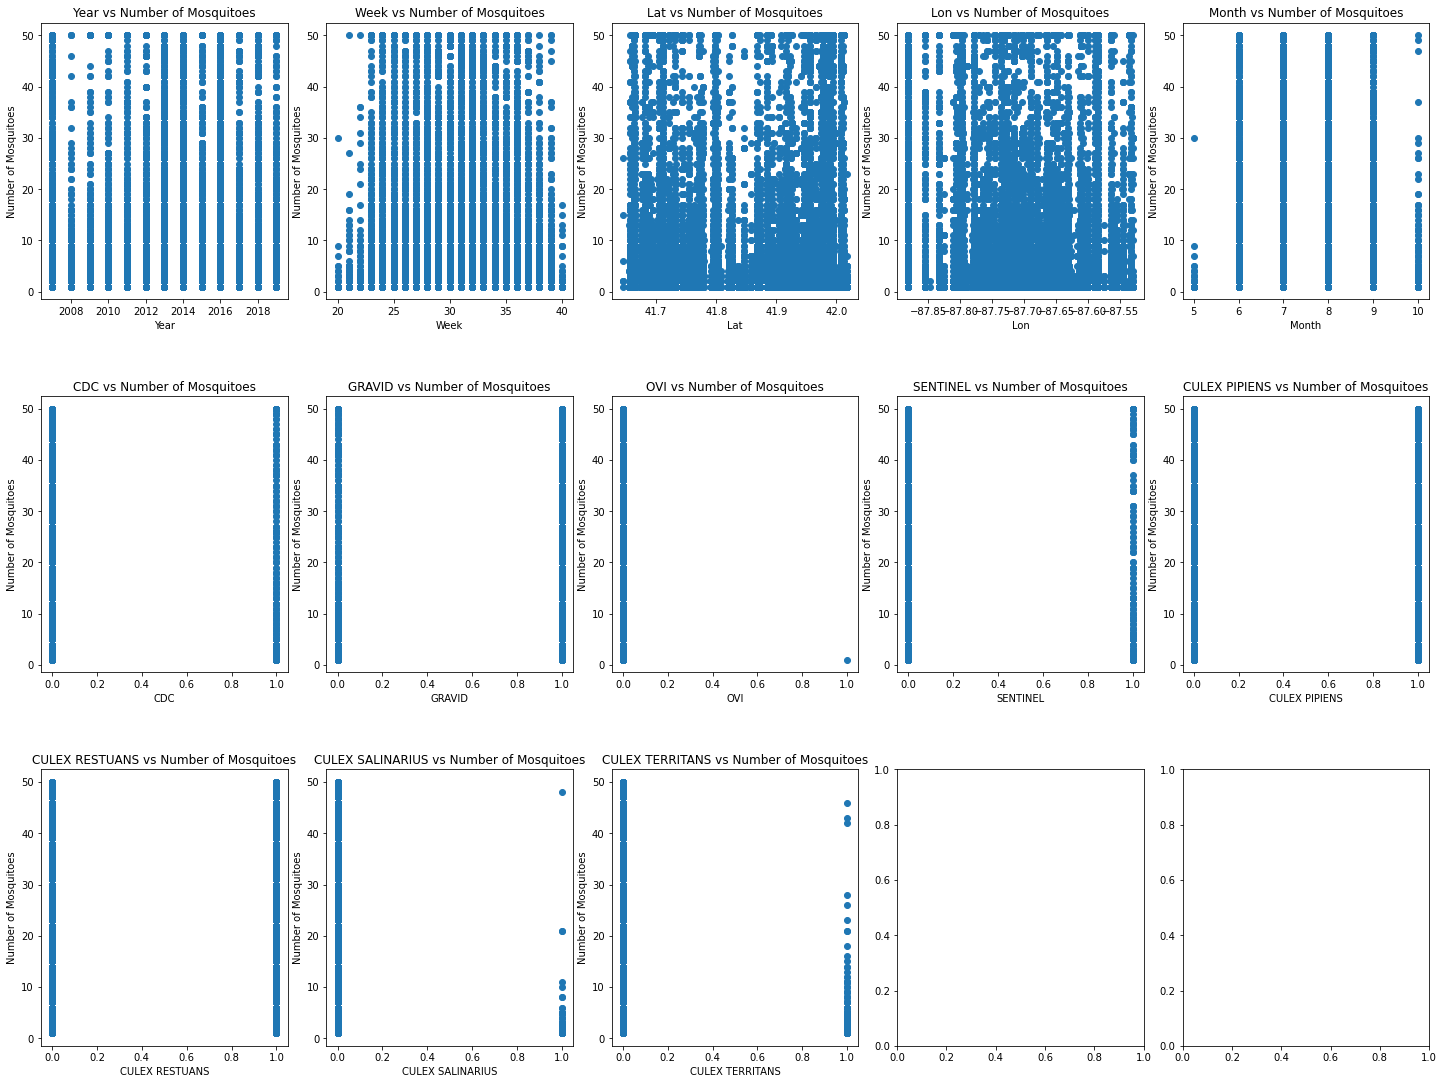

In [30]:
# Check for linearity between each independent and dependent variables:

plt.subplots(3,5, figsize=(20,15))

count=1

for col in X.columns:
    plt.subplot(3,5,count)
    plt.scatter(X[col], Y)
    plt.ylabel("Number of Mosquitoes")
    plt.xlabel(col)
    plt.title(f"{col} vs Number of Mosquitoes")
    
    count += 1
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

There seems to be no distinct linear relationship between the independent variables and dependent variable, but this does not mean that the independent variables violates the assumption that there is a linear relationship between the predictor variables and the dependent variables.

The next step is to check for any collinearity between the independent variables, due to the assumption that the predictor variables are independent of each other when building a linear assumption.

In [31]:
# Check for any linearity between the independent variables:

X_corr = X.corr()
X_corr

,Year,Week,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Year,1.000000,-0.023283,0.093983,-0.094628,-0.100847,-0.261514,0.155283,-0.011656,0.128327,-0.347588,0.343895,-0.066536,0.005373
Week,-0.023283,1.000000,-0.002876,0.002967,0.948940,0.028723,-0.047021,-0.013587,0.043002,0.316788,-0.315605,-0.011918,0.036645
Lat,0.093983,-0.002876,1.000000,-0.749416,-0.011544,-0.068795,0.067916,0.001292,-0.017184,-0.052372,0.076660,-0.004388,-0.056925
Lon,-0.094628,0.002967,-0.749416,1.000000,0.010695,0.060961,-0.081628,-0.004017,0.055548,0.021916,-0.055278,-0.004243,0.078145
Month,-0.100847,0.948940,-0.011544,0.010695,1.000000,0.070174,-0.078398,-0.011988,0.035333,0.330760,-0.327509,-0.010218,0.032683
CDC,-0.261514,0.028723,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.001280,-0.018611,0.158779,-0.150160,0.038892,-0.022071
GRAVID,0.155283,-0.047021,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.035669,-0.518582,-0.109750,0.098497,-0.029333,0.028193
OVI,-0.011656,-0.013587,0.001292,-0.004017,-0.011988,-0.001280,-0.035669,1.000000,-0.000786,0.011323,-0.009838,-0.000818,-0.001680
SENTINEL,0.128327,0.043002,-0.017184,0.055548,0.035333,-0.018611,-0.518582,-0.000786,1.000000,-0.049268,0.056440,-0.007235,-0.017349
CULEX PIPIENS,-0.347588,0.316788,-0.052372,0.021916,0.330760,0.158779,-0.109750,0.011323,-0.049268,1.000000,-0.868829,-0.072228,-0.148322


**The table is hard to read, so I created a heat map to visualize the table better:**

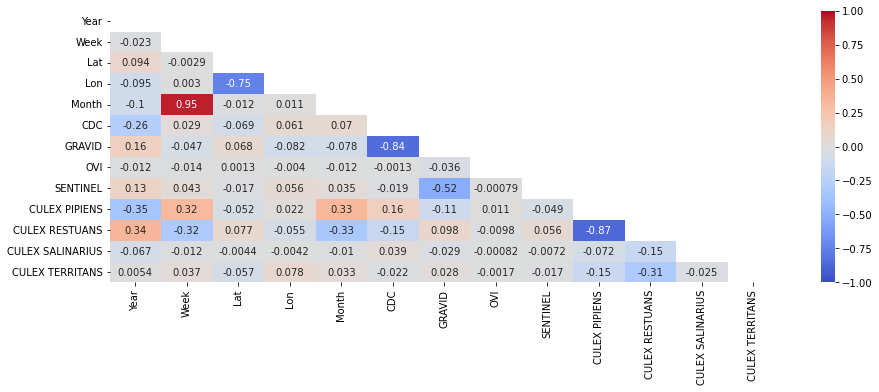

In [32]:
mask = np.triu(X_corr)

plt.figure(figsize=(15,5))

sns.heatmap(X_corr, cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, mask=mask)

plt.show()

This heat map shows the correlation between each independent variable. The correlation is explained that if there is a negative signed correlation, the independent variables indicates a negative correlation relationship. If there is a positive signed correlation, the independent variables indicates a positive correlation relationship.

Based on the heat map, there are a few co-linearity between the independent variables, for example, `Month` is highly correlated with `Week` with a correlation of 0.95. This means that there is a positive correlation relationship between the `Month` column and `Week` column. Indicating that if one of the column increases, the other column would increase.


`CDC` is also highly correlated with `GRAVID` with a correlation of -0.84, indicating a negative correlation relationship between the `CDC` column and `GRAVID` column, meaning that if one of the columns decreases, the other column would increase. `CULEX PIPIENS` is also highly correlated with `CULEX RESTUANS` with a correlation of -0.87, also indicating a negative correlation relationship. `Lat` and `Lon` also have a negative correlation relationship with a correlation of -0.75 indicating a negative correlation relationship.


These will be kept in mind when building the linear regression model.

Since this will be an iterative process, the different models were built in different sections.

### Model 1.1 - Original
This model is the original, with all the original independent variables. I wanted to see what would happen if one of the distinct dummy variables created were not dropped.

Since the independent and dependent variables have been defined, a new column of constants set to 1, was added to the "X" column (independent variables):

In [33]:
# Add a column of constants to X.
# Check to make sure it worked.

X_withconstant = sm.add_constant(X)
X_withconstant.head() #just to check that it actually worked

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,1.0,2019,39,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,1.0,2019,39,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,1.0,2019,39,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,1.0,2019,39,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


The next step is to instantiate and fit the linear regression model using the functions: `sm.OLS` and `.fit()`. Following this, a summary was printed using `.summary()`.

In [34]:
# Instantiate and fit the model.
num_mosquitoes_regression = sm.OLS(Y,X_withconstant)

# Print out the summary.
num_mosquitoes_regression_results = num_mosquitoes_regression.fit()

num_mosquitoes_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:09:11   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18483   BIC:                         1.470e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2003.4555     74.302    -26.964      0.000   -2149.094   -1857.817
Year                 0.5333      0.029     18.425      0.000       0.477       0.590
Week                -0.0762      0.072     -1.065      0.287      -0.216       0.064
Lat                 -4.8662      1.239     -3.928      0.000      -7.294      -2.438
Lon                -24.5167      1.503    -16.314      0.000     -27.462     -21.571
Month               -0.3356      0.311     -1.080      0.280      -0.945       0.273
CDC               -493.3875     18.713    -26.366      0.000    -530.066    -456.709
GRAVID            -504.3811     18.778    -26.860      0.000    -541.188    -467.574
OVI               -514.3623     21.192    -24.271      0.000    -555.901    -472.824
SENTINEL          -491.3246     18.785    -26.154      0.000    -528.146    -454.503
CULEX PIPIENS     -495.7856     18.567    -26.702      0.000    -532.179    -459.392
CULEX RESTUANS    -497.0422     18.603    -26.718      0.000    -533.506    -460.578
CULEX SALINARIUS  -505.5478     18.584    -27.204      0.000    -541.973    -469.122
CULEX TERRITANS   -505.0798     18.567    -27.203      0.000    -541.473    -468.686
==============================================================================
Omnibus:                     4534.845   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8986.296
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     8.25e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1 | 0.093|

The p-value for `Month` and `Week` is significantly higher than the defined threshold of the p-value of 0.05, which shows that these variables are not statistically significant to the model. But, based on the previous question showing the average number of mosquitoes per month, a trend was noticed, so it would make sense that the `Month` column relates to the number of mosquitoes. So, for the next model, the `Week` column will be dropped to see how the model changes. The R-squared value is 0.093(9.3% of the variance in the data is explained), which is really low, meaning that the model is not the best, and there is room for improvement.

---

**Model 1.1: Determine how the independent variables affect the number of mosquitoes caught.**

---

For this specific model, the interpretations for each variable is as follows, assuming that the other variables stay constant:

* As 1 unit of `Year` increases, the number of mosquitoes increases by 0.53 mosquitoes
* As 1 unit of `Week` increases, the number of mosquitoes decreases by 0.08 mosquitoes
* As 1 unit of `Lat` increases, the number of mosquitoes decreases by 4.87 mosquitoes
* As 1 unit of `Lon` increases, the number of mosquitoes decreases by 24.52 mosquitoes
* As 1 unit of `Month` increases, the number of mosquitoes decreases by 0.34 mosquitoes
* As 1 unit of `CDC` increases, the number of mosquitoes decreases by 493.39 mosquitoes
* As 1 unit of `GRAVID` increases, the number of mosquitoes decreases by 504.38 mosquitoes
* As 1 unit of `OVI` increases, the number of mosquitoes decreases by 514.36 mosquitoes
* As 1 unit of `SENTINEL` increases, the number of mosquitoes decreases by 491.32 mosquitoes
* As 1 unit of `CULEX PIPIENS` increases, the number of mosquitoes decreases by 495.79 mosquitoes
* As 1 unit of `CULEX RESTUANS` increases, the number of mosquitoes decreases by 497.04 mosquitoes
* As 1 unit of `CULEX SALINARIUS` increases, the number of mosquitoes decreases by 505.55 mosquitoes
* As 1 unit of `CULEX TERRITANS` increases, the number of mosquitoes decreases by 505.08 mosquitoes

### Model 1.2
For this model, the `Week` column is dropped from the independent variable, since it was highly correlated with the `Month` column with a correlation of 0.95. In the previous model, both the `Week` and `Month` had p-values greater than the defined threshold of 0.05.

In [35]:
# Drop the Week column and make sure it actually got dropped.
X_model2 = X.drop("Week", axis=1)
X_model2.head()

,Year,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [36]:
# Add constants of 1 to X.
X_withconstant_model2 = sm.add_constant(X_model2)
X_withconstant_model2.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,1.0,2019,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,1.0,2019,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,1.0,2019,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,1.0,2019,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [37]:
# Instantiate and fit the model.
num_mosquitoes_model2_regression = sm.OLS(Y,X_withconstant_model2)

# Print out the summary.
num_mosquitoes_model2_regression_results = num_mosquitoes_model2_regression.fit()

num_mosquitoes_model2_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:09:11   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1994.2858     73.801    -27.022      0.000   -2138.943   -1849.629
Year                 0.5263      0.028     18.674      0.000       0.471       0.582
Lat                 -4.8771      1.239     -3.937      0.000      -7.305      -2.449
Lon                -24.5269      1.503    -16.321      0.000     -27.472     -21.581
Month               -0.6484      0.101     -6.428      0.000      -0.846      -0.451
CDC               -491.0806     18.587    -26.421      0.000    -527.513    -454.648
GRAVID            -502.1186     18.658    -26.912      0.000    -538.689    -465.548
OVI               -512.0215     21.078    -24.292      0.000    -553.336    -470.707
SENTINEL          -489.0651     18.665    -26.202      0.000    -525.651    -452.479
CULEX PIPIENS     -493.5042     18.443    -26.758      0.000    -529.655    -457.353
CULEX RESTUANS    -494.7339     18.476    -26.776      0.000    -530.949    -458.518
CULEX SALINARIUS  -503.2602     18.459    -27.264      0.000    -539.442    -467.079
CULEX TERRITANS   -502.7874     18.442    -27.263      0.000    -538.935    -466.640
==============================================================================
Omnibus:                     4535.908   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.208
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     8.18e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1 | 0.093 |
| Model 1.2 | 0.092 |

This is interesting, now that the `Week` column has been removed, the p-value for `Month` is now at 0.000, which is less than the defined threshold for the p-value of 0.05, meaning that the month is statistically significant to the model. Now, it looks like all the p-values for the independent variables are all below 0.05, validating the significance of each variable to the model. However, one of the dummy variables for the original `Trap type` column was not dropped. Based on the correlation heat map, `GRAVID` column had a high correlation with `CDC` and `SENTINEL`, so the `GRAVID` column will be dropped from the dummy variables and will act as a reference for the category.

Also, the R-squared value dropped a little bit and it is still very low, so there is more room for improvement.

---

**Model 1.2: Determine how the independent variables affect the number of mosquitoes caught.**

---

For this specific model, the interpretations for each variable is as follows, assuming that the other variables stay constant:

* As 1 unit for `Year` increases, the number of mosquitoes increases by 0.53 mosquitoes
* As 1 unit for `Lat` increases, the number of mosquitoes decreases by 4.88 mosquitoes
* As 1 unit for `Lon` increases, the number of mosquitoes decreases by 24.53 mosquitoes
* As 1 unit for `Month` increases, the number of mosquitoes decreases by 0.65 mosquitoes
* As 1 unit for `CDC` increases, the number of mosquitoes decreases by 491.08 mosquitoes
* As 1 unit for `GRAVID` increases, the number of mosquitoes decreases by 502.12 mosquitoes
* As 1 unit for `OVI` increases, the number of mosquitoes decreases by 512.02 mosquitoes
* As 1 unit for `SENTINEL` increases, the number of mosquitoes decreases by 489.07 mosquitoes
* As 1 unit for `CULEX PIPIENS` increases, the number of mosquitoes decreases by 493.5 mosquitoes
* As 1 unit for `CULEX RESTUANS` increases, the number of mosquitoes decreases by 494.73 mosquitoes
* As 1 unit for `CULEX SALINARIUS` increases, the number of mosquitoes decreases by 503.26 mosquitoes
* As 1 unit for `CULEX TERRITANS` increases, the number of mosquitoes decreases by 502.79 mosquitoes

### Model 1.3
Since one of the dummy variables for the `Trap type` column was not dropped, for this model, the `GRAVID` column is dropped from the independent variable, and will be used as a reference category. This column was dropped because it is highly correlated to two (2) other trap types: `CDC` and `SENTINEL`

In [38]:
X_model3 = X_model2.drop("GRAVID", axis=1)
X_model3.head()

,Year,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,41.977738,-87.880969,9,0,0,0,0,1,0,0
1,2019,41.798211,-87.736925,9,0,0,0,0,1,0,0
2,2019,41.987245,-87.689417,9,0,0,0,0,1,0,0
3,2019,41.953664,-87.724987,9,0,0,0,0,1,0,0
4,2019,41.657069,-87.546049,9,0,0,0,0,1,0,0


In [39]:
X_withconstant_model3 = sm.add_constant(X_model3)
X_withconstant_model3.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,0,0,0,1,0,0
1,1.0,2019,41.798211,-87.736925,9,0,0,0,0,1,0,0
2,1.0,2019,41.987245,-87.689417,9,0,0,0,0,1,0,0
3,1.0,2019,41.953664,-87.724987,9,0,0,0,0,1,0,0
4,1.0,2019,41.657069,-87.546049,9,0,0,0,0,1,0,0


In [40]:
# Instantiate and fit the model.
num_mosquitoes_model3_regression = sm.OLS(Y,X_withconstant_model3)

# Print out the summary.
num_mosquitoes_model3_regression_results = num_mosquitoes_model3_regression.fit()

num_mosquitoes_model3_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:09:11   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2395.9807     88.541    -27.061      0.000   -2569.528   -2222.433
Year                 0.5263      0.028     18.674      0.000       0.471       0.582
Lat                 -4.8771      1.239     -3.937      0.000      -7.305      -2.449
Lon                -24.5269      1.503    -16.321      0.000     -27.472     -21.581
Month               -0.6484      0.101     -6.428      0.000      -0.846      -0.451
CDC                 11.0380      0.582     18.975      0.000       9.898      12.178
OVI                 -9.9029     12.844     -0.771      0.441     -35.079      15.273
SENTINEL            13.0535      0.905     14.423      0.000      11.280      14.827
CULEX PIPIENS     -593.9280     22.128    -26.841      0.000    -637.301    -550.555
CULEX RESTUANS    -595.1576     22.161    -26.856      0.000    -638.595    -551.720
CULEX SALINARIUS  -603.6840     22.142    -27.264      0.000    -647.084    -560.284
CULEX TERRITANS   -603.2112     22.126    -27.262      0.000    -646.580    -559.842
==============================================================================
Omnibus:                     4535.908   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.208
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     5.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1 | 0.093 |
| Model 1.2 | 0.092 |
| Model 1.3 | 0.092 |

Now that the `GRAVID` column has been dropped and used as a reference for the category, the column `OVI` is now not statistically significant to the model, with a p-value of 0.441, which is higher than the defined threshold of 0.05. 
The R-squared value remains unchanged with a value of 0.092 (9.2%). Aside the `OVI` column, it seems that the other independent variables are statistically significant to the model.


However, one of the dummy variables for the original `Species` column was not dropped. Based on the correlation heat map, `CULEX RESTUANS` column had a high correlation with `CULEX PIPIENS` and other independent variables, so the `CULEX RESTUANS` column will be dropped from the dummy variables and will act as a reference for the category. 


It would be interesting to see how the model reacts if the `OVI` column is dropped due to its high p-value. The `OVI` column will be dropped after the dummy variable for the species type is dropped and the linear regression model is executed. 

---

**Model 1.3: Determine how the independent variables affect the number of mosquitoes caught.**

---

For this specific model, the interpretations for each variable is as follows, assuming that the other variables stay constant:

- With one unit increase in `Year`, there is a 0.53 increase in the number of mosquitoes
- With one unit increase in `Lat`, there is a 4.88 decrease in the number of mosquitoes
- With one unit increase in `Lon`, there is a 24.53 decrease in the number of mosquitoes
- With one unit increase in `Month`, there is a 0.65 decrease in the number of mosquitoes
- With one unit increase in `CDC`, there is a 11.04 increase in the number of mosquitoes
- With one unit increase in `OVI`, there is a 9.9 decrease in the number of mosquitoes
- With one unit increase in `SENTINEL`, there is a 13.05 increase in the number of mosquitoes
- With one unit increase in `CULEX PIPIENS`, there is a 593.93 decrease in the number of mosquitoes
- With one unit increase in `CULEX RESTUANS`, there is a 595.16 decrease in the number of mosquitoes
- With one unit increase in `CULEX SALINARIUS`, there is a 603.68 decrease in the number of mosquitoes
- With one unit increase in `CULEX TERRITANS`, there is a 603.21 decrease in the number of mosquitoes

### Model 1.4
Dropped `CULEX RESTUANS` column from the original `Species` column where the dummy variables were created from. This will act as a reference category. This column was dropped because it is the species column that has the highest correlations with other independent variables.

In [41]:
X_model4 = X_model3.drop("CULEX RESTUANS", axis=1)
X_model4.head()

,Year,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,41.977738,-87.880969,9,0,0,0,0,0,0
1,2019,41.798211,-87.736925,9,0,0,0,0,0,0
2,2019,41.987245,-87.689417,9,0,0,0,0,0,0
3,2019,41.953664,-87.724987,9,0,0,0,0,0,0
4,2019,41.657069,-87.546049,9,0,0,0,0,0,0


In [42]:
X_withconstant_model4 = sm.add_constant(X_model4)
X_withconstant_model4.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,0,0,0,0,0
1,1.0,2019,41.798211,-87.736925,9,0,0,0,0,0,0
2,1.0,2019,41.987245,-87.689417,9,0,0,0,0,0,0
3,1.0,2019,41.953664,-87.724987,9,0,0,0,0,0,0
4,1.0,2019,41.657069,-87.546049,9,0,0,0,0,0,0


In [43]:
# Instantiate and fit the model.
num_mosquitoes_model4_regression = sm.OLS(Y,X_withconstant_model4)

# Print out the summary.
num_mosquitoes_model4_regression_results = num_mosquitoes_model4_regression.fit()

num_mosquitoes_model4_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:09:11   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18484   BIC:                         1.470e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2991.1382    110.700    -27.020      0.000   -3208.121   -2774.155
Year                 0.5263      0.028     18.674      0.000       0.471       0.582
Lat                 -4.8771      1.239     -3.937      0.000      -7.305      -2.449
Lon                -24.5269      1.503    -16.321      0.000     -27.472     -21.581
Month               -0.6484      0.101     -6.428      0.000      -0.846      -0.451
CDC                 11.0380      0.582     18.975      0.000       9.898      12.178
OVI                 -9.9029     12.844     -0.771      0.441     -35.079      15.273
SENTINEL            13.0535      0.905     14.423      0.000      11.280      14.827
CULEX PIPIENS        1.2296      0.238      5.159      0.000       0.762       1.697
CULEX SALINARIUS    -8.5264      0.867     -9.832      0.000     -10.226      -6.826
CULEX TERRITANS     -8.0536      0.444    -18.135      0.000      -8.924      -7.183
==============================================================================
Omnibus:                     4535.908   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.208
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1 | 0.093 |
| Model 1.2 | 0.092 |
| Model 1.3 | 0.092 |
| Model 1.4 | 0.092 |

Removing the `CULEX RESTUANS` column from the model drastically reduced the values of the coefficients of the other species types. The other specie types are still statistically significant to the model and the R-squared value remain unchanged. Now, the only independent variable that is not statistically significant is the `OVI` column. This will be dropped in the next iteration to understand how it would affect the linear regression model. 

---

**Model 1.4: Determine how the independent variables affect the number of mosquitoes caught.**

---

The interpretations for each variable is as follows, assuming that the other variables stay constant:

- With one unit increase in `Year`, there is a 0.53 increase in the number of mosquitoes
- With one unit increase in `Lat`, there is a 4.88 decrease in the number of mosquitoes
- With one unit increase in `Lon`, there is a 24.53 decrease in the number of mosquitoes
- With one unit increase in `Month`, there is a 0.65 decrease in the number of mosquitoes
- With one unit increase in `CDC`, there is a 11.04 increase in the number of mosquitoes
- With one unit increase in `OVI`, there is a 9.9 decrease in the number of mosquitoes
- With one unit increase in `SENTINEL`, there is a 13.05 increase in the number of mosquitoes
- With one unit increase in `CULEX PIPIENS`, there is a 1.23 increase in the number of mosquitoes
- With one unit increase in `CULEX SALINARIUS`, there is a 8.53 decrease in the number of mosquitoes
- With one unit increase in `CULEX TERRITANS`, there is a 8.05 decrease in the number of mosquitoes

### Model 1.5
Dropped `OVI` column to see if it would have an effect on the linear regression model, as it is the only independent variable (as of right now) that is not statistically significant.

In [44]:
X_model5 = X_model4.drop("OVI", axis=1)
X_model5.head()

,Year,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,41.977738,-87.880969,9,0,0,0,0,0
1,2019,41.798211,-87.736925,9,0,0,0,0,0
2,2019,41.987245,-87.689417,9,0,0,0,0,0
3,2019,41.953664,-87.724987,9,0,0,0,0,0
4,2019,41.657069,-87.546049,9,0,0,0,0,0


In [45]:
X_withconstant_model5 = sm.add_constant(X_model5)
X_withconstant_model5.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,41.977738,-87.880969,9,0,0,0,0,0
1,1.0,2019,41.798211,-87.736925,9,0,0,0,0,0
2,1.0,2019,41.987245,-87.689417,9,0,0,0,0,0
3,1.0,2019,41.953664,-87.724987,9,0,0,0,0,0
4,1.0,2019,41.657069,-87.546049,9,0,0,0,0,0


In [46]:
# Instantiate and fit the model.
num_mosquitoes_model5_regression = sm.OLS(Y,X_withconstant_model5)

# Print out the summary.
num_mosquitoes_model5_regression_results = num_mosquitoes_model5_regression.fit()

num_mosquitoes_model5_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     209.2
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:09:11   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18485   BIC:                         1.470e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2991.1501    110.699    -27.021      0.000   -3208.131   -2774.170
Year                 0.5265      0.028     18.683      0.000       0.471       0.582
Lat                 -4.8754      1.239     -3.936      0.000      -7.304      -2.447
Lon                -24.5215      1.503    -16.318      0.000     -27.467     -21.576
Month               -0.6471      0.101     -6.416      0.000      -0.845      -0.449
CDC                 11.0401      0.582     18.979      0.000       9.900      12.180
SENTINEL            13.0520      0.905     14.422      0.000      11.278      14.826
CULEX PIPIENS        1.2273      0.238      5.150      0.000       0.760       1.694
CULEX SALINARIUS    -8.5261      0.867     -9.831      0.000     -10.226      -6.826
CULEX TERRITANS     -8.0540      0.444    -18.136      0.000      -8.924      -7.184
==============================================================================
Omnibus:                     4536.056   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8990.652
Skew:                           1.504   Prob(JB):                         0.00
Kurtosis:                       4.618   Cond. No.                     2.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.1 | 0.093 |
| Model 1.2 | 0.092 |
| Model 1.3 | 0.092 |
| Model 1.4 | 0.092 |
| Model 1.5 | 0.092 |

Now, all the independent variables are statistically significant to the model, this is based on the notion that all the p-values for the independent variables are less than the defined threshold of 0.05. The R-squared value is still low and very slightly lower than the original model's R-squared value, so there is still room to improve the explanation of variance in the data. Based on the p-values all being statistically significant, no more subtractions will be made.

---

**Model 1.5: Determine how the independent variables affect the number of mosquitoes caught.**

---

The interpretations for each variable is as follows, assuming that the other variables stay constant:
    
- With one unit increase in `Year`, there is a 0.53 increase in the number of mosquitoes
- With one unit increase in `Lat`, there is a 4.88 decrease in the number of mosquitoes
- With one unit increase in `Lon`, there is a 24.52 decrease in the number of mosquitoes
- With one unit increase in `Month`, there is a 0.65 decrease in the number of mosquitoes
- With one unit increase in `CDC`, there is a 11.04 increase in the number of mosquitoes
- With one unit increase in `SENTINEL`, there is a 13.05 increase in the number of mosquitoes
- With one unit increase in `CULEX PIPIENS`, there is a 1.23 increase in the number of mosquitoes
- With one unit increase in `CULEX SALINARIUS`, there is a 8.53 decrease in the number of mosquitoes
- With one unit increase in `CULEX TERRITANS`, there is a 8.05 decrease in the number of mosquitoes

### MODEL DIAGNOSTICS:
---

Now that the linear regression model is done, the model residuals were checked to see if it is normally distributed, following that, a Q-Q plot and the Shapiro-Wilk test was completed.

#### Residuals

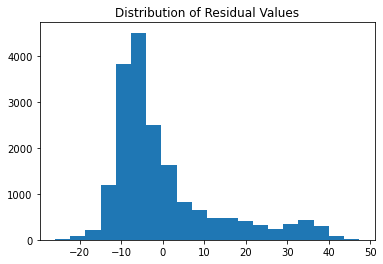

In [47]:
# Plotting the residuals of the model 1.5
plt.figure()

plt.hist(num_mosquitoes_model5_regression_results.resid, bins = 20)
plt.title('Distribution of Residual Values')

plt.show()

The distribution of the residual values does not look like it is normally distributed. In order to trust that the p-values that were calculated for the regression coefficients, the residuals would need to be normally distributed. Based on this histogram, the residual values do not look normally distributed, which means that the p-values calculated cannot be trusted to be accurate. 

Next, is the Shapiro-Wilk test.

In [48]:
# Calculation for the shapiro test statisic and p-value

print("Shapiro-Wilk Test: ", stats.shapiro(num_mosquitoes_model5_regression_results.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.827078640460968, pvalue=0.0)


/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro-Wilk test has a null hypothesis that states that the data is normally distributed. The p-value is 0.0 which is less than 0.05. Normally, the null hypothesis that the data is normally distributed would be rejected, but there is an error that says the p-value may not be accurate because the sample size is more than 5,000. So, the null hypothesis cannot be rejected. It is understood that the Shapiro-Wilk test is very sensitive, so a normal Q-Q plot will be executed next.

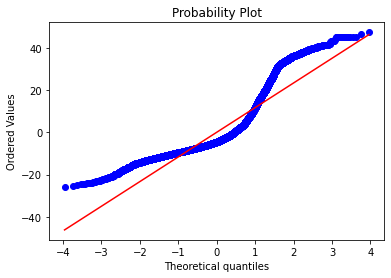

In [49]:
# Q-Q plot

plt.figure()

stats.probplot(num_mosquitoes_model5_regression_results.resid, dist="norm", plot = plt);

plt.show()

This Q-Q plot shows that the data is not normal.

#### HOMOSCEDASTICITY:
---

To see if the linear regression model is considered a good method to modeling the specified dependent variable, it is expected that the residuals be homoscedastic, where the variance in the model residuals should be constant as the 

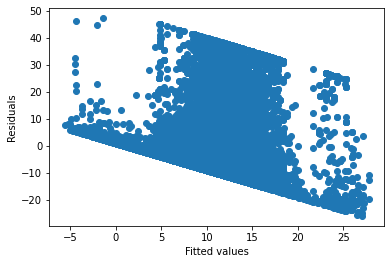

In [50]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(num_mosquitoes_model5_regression_results.fittedvalues, num_mosquitoes_model5_regression_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

The plot shows that the residuals are not homoscedastic, because it looks like there is a pattern between the residuals and fitted values. The plot shows that the residuals and fitted values is heteroscedatic.

---
## Part 3 - QUESTION 2 

---

**Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the models' limitations. This may end up being an iterative process.**


**Note:** 
`Mosquito number` should be one of your independent variables.

---

In [51]:
# to have the original dataset available here
mosquito_df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present_positive,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [52]:
# Define the independent and dependent variables:

# Independent variable:
X_log = mosquito_df.drop(["WNV Present_positive", "Address Block", "Trap", "Date"], axis=1)

# Dependent variable:
Y_log = mosquito_df["WNV Present_positive"]

print(X_log.shape, Y_log.shape) # to make sure I have the right number of columns and rows

(18495, 14) (18495,)


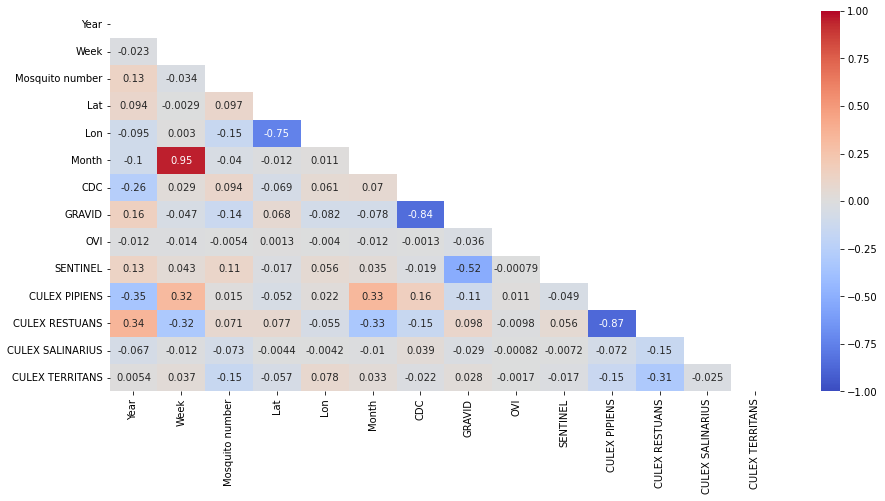

In [53]:
# Check for any multicollinearity within the independent variables. 

mask = np.triu(X_log.corr())

plt.figure(figsize=(15,7))
sns.heatmap(X_log.corr(), cmap='coolwarm', vmin=-1.0, vmax=1.0, annot=True, mask=mask)
plt.show()

The correlations between the independent and dependent variables show a high correlation of 0.95 between the `Week` and `Month` column. There is also a high correlation of -0.75 between the `Lat` and `Lon` columns, a high correlation of -0.84 between the `GRAVID` and `CDC` columns, a high correlation of -0.87 between the `CULEX RESTUANS` and `CULEX PIPIENS` columns. Th `GRAVID` column and `SENTINEL` column also has a significant correlation of -0.52. These will be kept in mind when creating the logistic regression model.

### Model 2.1 - Original Model

In [54]:
# Fitting the logistic regression model

X_log_withconstant = sm.add_constant(X_log)
X_log_withconstant.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Mosquito number,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [55]:
WNV_logit = sm.Logit(Y_log, X_log_withconstant)

WNV_logit_results = WNV_logit.fit()

WNV_logit_results.summary()

         Current function value: 0.405443
         Iterations: 35


/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     WNV Present_positive   No. Observations:                18495
Model:                            Logit   Df Residuals:                    18481
Method:                             MLE   Df Model:                           13
Date:                  Sun, 19 Jun 2022   Pseudo R-squ.:                  0.2229
Time:                          15:09:12   Log-Likelihood:                -7498.7
converged:                        False   LL-Null:                       -9649.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -347.7240        nan        nan        nan         nan         nan
Year                 0.1130      0.007     16.467      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number      0.0651      0.001     44.694      0.000       0.062       0.068
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                -83.9833        nan        nan        nan         nan         nan
GRAVID             -83.8276        nan        nan        nan         nan         nan
OVI                -97.1166        nan        nan        nan         nan         nan
SENTINEL           -84.2216        nan        nan        nan         nan         nan
CULEX PIPIENS      -86.0677   1.06e+06  -8.08e-05      1.000   -2.09e+06    2.09e+06
CULEX RESTUANS     -86.3178   1.06e+06  -8.11e-05      1.000   -2.09e+06    2.09e+06
CULEX SALINARIUS   -87.0629   1.06e+06  -8.18e-05      1.000   -2.09e+06    2.09e+06
CULEX TERRITANS    -88.5577   1.06e+06  -8.32e-05      1.000   -2.09e+06    2.09e+06
====================================================================================
"""

All four (4) categories of the `Trap type` produced 'nan' for the p-values, `const` also produced 'nan' for the p-value. In the next model, `GRAVID` will be dropped since it had a high correlation with other independent variables. This might fix the 'nan' values.

### Model 2.2
Dropped `GRAVID` column.

In [56]:
X_log.head()

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,1,0,0,0,1,0,0
1,2019,39,1,41.798211,-87.736925,9,0,1,0,0,0,1,0,0
2,2019,39,2,41.987245,-87.689417,9,0,1,0,0,0,1,0,0
3,2019,39,1,41.953664,-87.724987,9,0,1,0,0,0,1,0,0
4,2019,39,9,41.657069,-87.546049,9,0,1,0,0,0,1,0,0


In [57]:
X_log_model2 = X_log.drop(["GRAVID"], axis=1)
X_log_model2.head()

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,1,0,0
1,2019,39,1,41.798211,-87.736925,9,0,0,0,0,1,0,0
2,2019,39,2,41.987245,-87.689417,9,0,0,0,0,1,0,0
3,2019,39,1,41.953664,-87.724987,9,0,0,0,0,1,0,0
4,2019,39,9,41.657069,-87.546049,9,0,0,0,0,1,0,0


In [58]:
# Fitting the logistic regression model

X_log_withconstant_model2 = sm.add_constant(X_log_model2)
X_log_withconstant_model2.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Mosquito number,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,1,0,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,0,0,0,1,0,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,0,0,0,1,0,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,0,0,0,1,0,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,0,0,0,1,0,0


In [59]:
WNV_logit_model2 = sm.Logit(Y_log, X_log_withconstant_model2)

WNV_logit_model2_results = WNV_logit_model2.fit()

WNV_logit_model2_results.summary()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.405443
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     WNV Present_positive   No. Observations:                18495
Model:                            Logit   Df Residuals:                    18481
Method:                             MLE   Df Model:                           13
Date:                  Sun, 19 Jun 2022   Pseudo R-squ.:                  0.2229
Time:                          15:09:12   Log-Likelihood:                -7498.7
converged:                        False   LL-Null:                       -9649.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -414.8428        nan        nan        nan         nan         nan
Year                 0.1130      0.007     16.467      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number      0.0651      0.001     44.694      0.000       0.062       0.068
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                 -0.1557      0.132     -1.184      0.237      -0.413       0.102
OVI                -13.9528   6891.352     -0.002      0.998   -1.35e+04    1.35e+04
SENTINEL            -0.3940      0.171     -2.304      0.021      -0.729      -0.059
CULEX PIPIENS     -102.7766        nan        nan        nan         nan         nan
CULEX RESTUANS    -103.0267        nan        nan        nan         nan         nan
CULEX SALINARIUS  -103.7717        nan        nan        nan         nan         nan
CULEX TERRITANS   -105.2666        nan        nan        nan         nan         nan
====================================================================================
"""

This is better with regards to the p-values of the other trap types. We can see that `CDC` and `OVI` have a high p-value of 0.237 and 0.998, which surpasses the threshold set for the p-value of 0.05, meaning that these variables may not be statistically significant to the model. It is also observed that the four (4) categories of mosquito species are now producing 'nan' for p-values, and the `const` p-value hasn't changed from 'nan'. The `CULEX RESTUANS` will be dropped as it had the highest correlation between the other independent variables.

### Model 2.3
Dropped `CULEX RESTUANS` column.

In [60]:
X_log_model3 = X_log_model2.drop(["CULEX RESTUANS"], axis=1)
X_log_model3.head()

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,0,0
1,2019,39,1,41.798211,-87.736925,9,0,0,0,0,0,0
2,2019,39,2,41.987245,-87.689417,9,0,0,0,0,0,0
3,2019,39,1,41.953664,-87.724987,9,0,0,0,0,0,0
4,2019,39,9,41.657069,-87.546049,9,0,0,0,0,0,0


In [61]:
# Fitting the logistic regression model

X_log_withconstant_model3 = sm.add_constant(X_log_model3)
X_log_withconstant_model3.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Mosquito number,Lat,Lon,Month,CDC,OVI,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,0,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,0,0,0,0,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,0,0,0,0,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,0,0,0,0,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,0,0,0,0,0


In [62]:
WNV_logit_model3 = sm.Logit(Y_log, X_log_withconstant_model3)

WNV_logit_model3_results = WNV_logit_model3.fit()

WNV_logit_model3_results.summary()

         Current function value: 0.405443
         Iterations: 35


/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     WNV Present_positive   No. Observations:                18495
Model:                            Logit   Df Residuals:                    18482
Method:                             MLE   Df Model:                           12
Date:                  Sun, 19 Jun 2022   Pseudo R-squ.:                  0.2229
Time:                          15:09:12   Log-Likelihood:                -7498.7
converged:                        False   LL-Null:                       -9649.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -517.8695     25.221    -20.534      0.000    -567.301    -468.438
Year                 0.1130      0.007     16.467      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number      0.0651      0.001     44.694      0.000       0.062       0.068
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                 -0.1557      0.132     -1.184      0.237      -0.413       0.102
OVI                -13.9528   6891.317     -0.002      0.998   -1.35e+04    1.35e+04
SENTINEL            -0.3940      0.171     -2.304      0.021      -0.729      -0.059
CULEX PIPIENS        0.2502      0.051      4.876      0.000       0.150       0.351
CULEX SALINARIUS    -0.7450      0.322     -2.316      0.021      -1.375      -0.115
CULEX TERRITANS     -2.2399      0.273     -8.197      0.000      -2.775      -1.704
====================================================================================
"""

The 'nan' values are all gone from the `const` and species types. From this model, all the independent variables are statistically significant, except `CDC` and `OVI`. Earlier, when looking at the columns that had positive or negative correlations, `OVI` had a correlation of -0.003859 with the `WNV Present_positive` column, which is arguably zero, meaning there is barely any correlation between `OVI` and `WNV Present_positive`. For the next iteration, the `OVI` column will be dropped to examine how the model will change.

### Model 2.4
Dropped `OVI` column.

In [63]:
X_log_model4 = X_log_model3.drop(["OVI"], axis=1)
X_log_model4.head()

,Year,Week,Mosquito number,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,0
1,2019,39,1,41.798211,-87.736925,9,0,0,0,0,0
2,2019,39,2,41.987245,-87.689417,9,0,0,0,0,0
3,2019,39,1,41.953664,-87.724987,9,0,0,0,0,0
4,2019,39,9,41.657069,-87.546049,9,0,0,0,0,0


In [64]:
# Fitting the logistic regression model

X_log_withconstant_model4 = sm.add_constant(X_log_model4)
X_log_withconstant_model4.head()

/Users/toluacquah/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year,Week,Mosquito number,Lat,Lon,Month,CDC,SENTINEL,CULEX PIPIENS,CULEX SALINARIUS,CULEX TERRITANS
0,1.0,2019,39,2,41.977738,-87.880969,9,0,0,0,0,0
1,1.0,2019,39,1,41.798211,-87.736925,9,0,0,0,0,0
2,1.0,2019,39,2,41.987245,-87.689417,9,0,0,0,0,0
3,1.0,2019,39,1,41.953664,-87.724987,9,0,0,0,0,0
4,1.0,2019,39,9,41.657069,-87.546049,9,0,0,0,0,0


In [65]:
WNV_logit_model4 = sm.Logit(Y_log, X_log_withconstant_model4)

WNV_logit_model4_results = WNV_logit_model4.fit()

WNV_logit_model4_results.summary()

Optimization terminated successfully.
         Current function value: 0.405444
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     WNV Present_positive   No. Observations:                18495
Model:                            Logit   Df Residuals:                    18483
Method:                             MLE   Df Model:                           11
Date:                  Sun, 19 Jun 2022   Pseudo R-squ.:                  0.2229
Time:                          15:09:12   Log-Likelihood:                -7498.7
converged:                         True   LL-Null:                       -9649.5
Covariance Type:              nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -517.8746     25.221    -20.534      0.000    -567.306    -468.443
Year                 0.1130      0.007     16.468      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number      0.0651      0.001     44.695      0.000       0.062       0.068
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                 -0.1556      0.132     -1.183      0.237      -0.413       0.102
SENTINEL            -0.3940      0.171     -2.304      0.021      -0.729      -0.059
CULEX PIPIENS        0.2501      0.051      4.876      0.000       0.150       0.351
CULEX SALINARIUS    -0.7450      0.322     -2.316      0.021      -1.375      -0.115
CULEX TERRITANS     -2.2399      0.273     -8.197      0.000      -2.775      -1.704
====================================================================================
"""

In this model, the optimization terminated successfully, unlike the other models that had a warning saying the maximum number of iterations has been exceeded. The only independent variable that is not statistically significant to the model is `CDC` which has a p-value of 0.237, higher than the threshold defined for the p-value of 0.05. Otherwise, the other independent variables have a p-value less than 0.05, indicating that they are statistically significant to the model.

---

**Model 2.4: Determine how the independent variables affect the number of mosquitoes caught.**

---

The interpretations for each variable is as follows, assuming that the other variables stay constant:
    
- With one unit increase in `Year`, the prevalence of West Nile Virus is increased by a factor of 0.113. 
- With one unit increase in `Week`, the prevalence of West Nile Virus is increased by a factor of 0.10.
- With one unit increase in `Mosquito number`, the prevalence of West Nile Virus is increased by a factor of 0.065.
- With one unit increase in `Lat`, the prevalence of West Nile Virus is decreased by a factor of 0.66.
- With one unit increase in `Lon`, the prevalence of West Nile Virus is decreased by a factor of 3.54.
- With one unit increase in `Month`, the prevalence of West Nile Virus is increased by a factor of 0.22.
- With one unit increase in `SENTINEL`, the prevalence of West Nile Virus is decreased by a factor of 0.39.
- With one unit increase in `CULEX PIPIENS`, the prevalence of West Nile Virus is increased by a factor of 0.25.
- With one unit increase in `CULEX SALINARIUS`, the prevalence of West Nile Virus is decreased by a factor of 0.75.
- With one unit increase in `CULEX TERRITANS`, the prevalence of West Nile Virus is decreased by a factor of 2.24.

This is identified in the table below showing the coefficients and odds ratio multiple for each independent variable.

In [66]:
coefficients = WNV_logit_model4_results.params
coefficients_df = pd.DataFrame({"Coefficient": coefficients, "Odds ratio multiple": np.exp(coefficients)})
coefficients_df.drop(['const', 'CDC'], inplace=True)
coefficients_df = coefficients_df.sort_values(by='Odds ratio multiple')
coefficients_df

,Coefficient,Odds ratio multiple
Lon,-3.543151,0.028922
CULEX TERRITANS,-2.239892,0.106470
CULEX SALINARIUS,-0.744998,0.474735
Lat,-0.659501,0.517109
SENTINEL,-0.394036,0.674330
Mosquito number,0.065073,1.067237
Week,0.100161,1.105349
Year,0.113036,1.119672
Month,0.220158,1.246274
CULEX PIPIENS,0.250114,1.284172


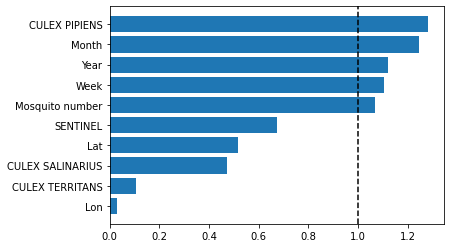

In [67]:
plt.figure()
plt.barh(coefficients_df.index, coefficients_df['Odds ratio multiple'])
plt.axvline(1.0, c="black", linestyle="--")
plt.show()

For every independent variable with an odds ratio multiple of 1 and above, as 1 unit of the independent variables increase, there is also an increase in the prevalence of West Nile Virus of a factor of each independent variable's coefficients.

In [68]:
# To check the accuracy of the model's performance
WNV_prevalence_logit_predictions_model4 = WNV_logit_model4_results.predict(X_log_withconstant_model4) > 0.5

accuracy = np.mean(WNV_prevalence_logit_predictions_model4 == Y_log)*100
accuracy

81.10840767775073

The model is ~81% of predictive accuracy on predicting the prevalence of West Nile Virus.